# Lab 04 : Train vanilla neural network -- demo

## Training a one-layer net on MNIST

In [1]:
import sys, os

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

### randint(a,b) returns a random integer between a and b:

In [5]:
idx = randint(5,10) # generate an integer randomly from 5 to 10 included.
print(idx)

5


### Download the TRAINING SET (data+labels)

In [6]:
from utils import check_mnist_dataset_exists
data_path = check_mnist_dataset_exists()

In [8]:
train_data = torch.load(data_path+'mnist/train_data.pt')
print(train_data.size())

torch.Size([60000, 28, 28])


In [9]:
train_label = torch.load(data_path+'mnist/train_label.pt')
print(train_label.size())

torch.Size([60000])


### Download the TEST SET (data only)

In [10]:
test_data = torch.load(data_path+'mnist/test_data.pt')
print(test_data.size())

torch.Size([10000, 28, 28])


### Make a one layer net class

In [17]:
class one_layer_net(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(one_layer_net, self).__init__()
        
        self.linear_layer = nn.Linear(input_size, output_size, bias = False)
    
    
    def forward(self, x):
        x = self.linear_layer(x)
        p = F.softmax(x, dim=1)
        
        return p

### Build the net

In [20]:
net = one_layer_net(784,10)
print(net)
print(net.linear_layer.weight.size())

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)
torch.Size([10, 784])


### Take the 6th image of the test set:

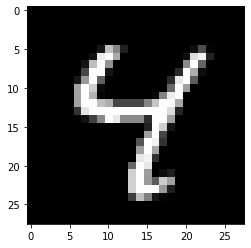

In [21]:
im = test_data[6]
utils.show(im)

### And feed it to the UNTRAINED network:

In [31]:
p = net(im.view(1,784))
print(torch.arange(784).size())
print(im.view(1,784).size())
print(p)

torch.Size([784])
torch.Size([1, 784])
tensor([[0.0868, 0.0847, 0.1039, 0.0766, 0.0891, 0.0895, 0.1240, 0.1281, 0.1000,
         0.1172]], grad_fn=<SoftmaxBackward>)


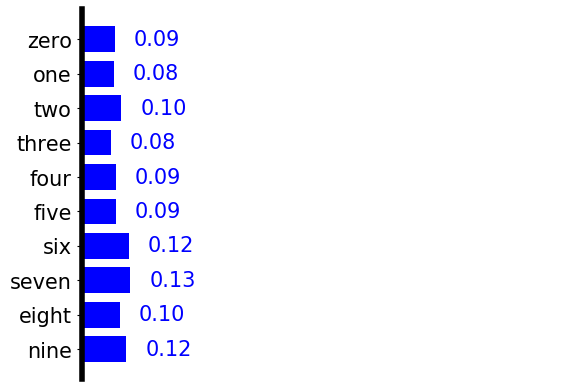

In [33]:
utils.show_prob_mnist(p)

### Train the network (only 50000 iterations) on the train set

In [34]:
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

for iter in range(1, 50000):
    # choose a random integer between 0 and 59,999
    # extract the corresponding picture and label
    # and reshape them to fit the networj
    idx = randint(0, 60000-1)
    input = train_data[idx].view(1, 784)
    label = train_label[idx].view(1)
    
    # feed the input to the net
    input.requires_grad_()
    prob = net(input)
    
    # update the weights (all the magic happens here -- we will discus it later)
    log_prob = torch.log(prob)
    loss = criterion(log_prob, label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

### Take the 6th image of the test set:

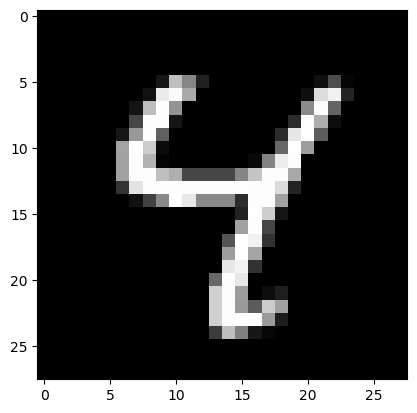

In [36]:
im = test_data[6]
utils.show(im)

### Feed it to the TRAINED net:

In [37]:
prob = net(im.view(1,784))
print(prob)

tensor([[2.9675e-06, 1.0362e-06, 1.0077e-06, 2.9320e-04, 9.4107e-01, 9.1922e-03,
         4.3963e-05, 9.2262e-04, 3.7978e-02, 1.0500e-02]],
       grad_fn=<SoftmaxBackward>)


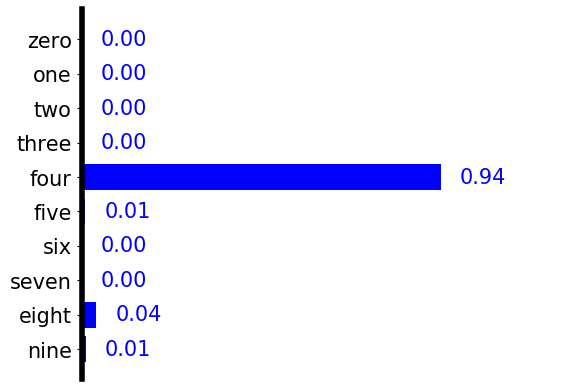

In [38]:
utils.show_prob_mnist(prob)

### Choose image at random from the test set and see how good/bad are the predictions

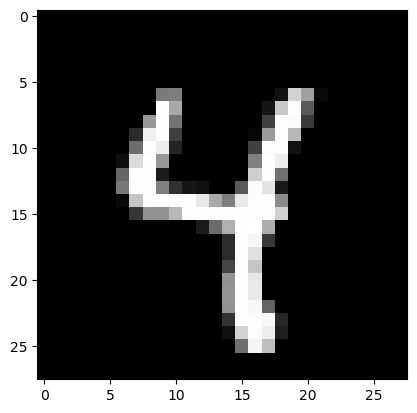

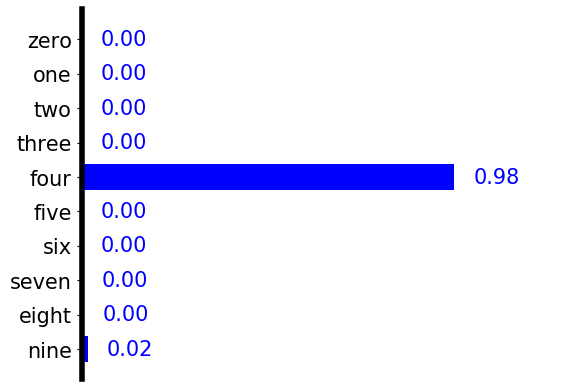

In [42]:
# choose a picture at random
idx = randint(0, 10000-1)
im = test_data[idx]

# display the picture
utils.show(im)

# feed it to the net and display the confidence scores
prob = net( im.view(1,784) )
utils.show_prob_mnist(prob)